In [1]:
import pandas as pd
import datetime
import csv
import pprint as pprint
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
#import sklearn.datasets as dta
#from scipy.stats import linregress
#from scipy.stats import sem
import json
import requests
import os
from dotenv import load_dotenv
import gzip
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
census_key = os.getenv("census_api_key")

In [ ]:
#DF List so far


In [ ]:
# average_median_sale_price_by_quarter.csv
# housing_availability_by_zip_and_property_type.csv
# monthly_housingsale_available_inventory.csv
# quarterly_housingsale_available_inventory.csv
# rentals_by_quarters.csv
# seattle_rentals_by_zipcodes.csv
# total_housing_availability_by_month.csv
# yearly_housingsale_available_inventory.csv

In [ ]:
# graph and regression outline


# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df['Max Temp (C)']
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept

# # Build scatter plot for latitude vs. temperature
# plt.figure(figsize=(12,10))
# plt.scatter(x_values, y_values, c=y_values, alpha = .5)

# # Incorporate the other graph properties2
# plt.title("Latitude vs Max Temps for Cities in the N. Hemisphere (2024-01-05)")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp (C)')
# plt.grid(True)
# plt.colorbar(label = "Temp")
# plt.annotate(line_eq, (20,5),fontsize=15,color="red")
# plt.plot(x_values, regress_values, "r-", label=line_eq)
# # Show plot
# plt.show()




# # Get regression values

# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# # Save the figure
# plt.savefig("../figures/fig_year_by_inventory.png")

In [2]:
# handling the year inventory csv
filepath_inventory = "../data_frames/yearly_housingsale_available_inventory.csv"
yearly_inventory = pd.read_csv(filepath_inventory)
yearly_inventory.head()

,Unnamed: 0,Zipcode,period_end,inventory
0,6,98101,2018-12-31,47.500000
1,7,98101,2019-12-31,56.250000
2,8,98101,2020-12-31,82.000000
3,9,98101,2021-12-31,59.833333
4,10,98101,2022-12-31,57.250000


In [3]:
yearly_inventory = yearly_inventory.drop(columns=['Unnamed: 0'])
yearly_inventory['period_end'] = pd.to_datetime(yearly_inventory['period_end'])
yearly_inventory

,Zipcode,period_end,inventory
0,98101,2018-12-31,47.500000
1,98101,2019-12-31,56.250000
2,98101,2020-12-31,82.000000
3,98101,2021-12-31,59.833333
4,98101,2022-12-31,57.250000
...,...,...,...
149,98199,2018-12-31,47.583333
150,98199,2019-12-31,59.916667
151,98199,2020-12-31,48.083333
152,98199,2021-12-31,33.250000


In [4]:
yearly_inventory.dtypes

Zipcode                int64
period_end    datetime64[ns]
inventory            float64
dtype: object

In [5]:
yearly_inventory['year'] = yearly_inventory['period_end'].dt.year

In [6]:
average_inventory_by_year = yearly_inventory.groupby('year')['inventory'].mean()
average_inventory_by_year

year
2018    45.934524
2019    61.747024
2020    58.538462
2021    38.474399
2022    43.374691
Name: inventory, dtype: float64

In [7]:
average_inventory_by_year = pd.DataFrame(average_inventory_by_year)
average_inventory_by_year

,inventory
year,
2018,45.934524
2019,61.747024
2020,58.538462
2021,38.474399
2022,43.374691


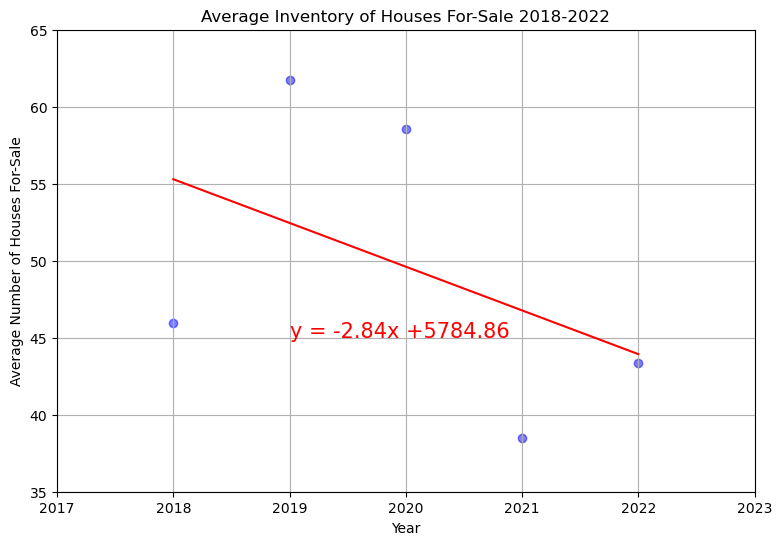

y = -2.84x +5784.86


In [8]:
x_values = average_inventory_by_year.index
y_values = average_inventory_by_year['inventory']


# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Build scatter plot for year vs inventory
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, c="blue", alpha = .5)


# Incorporate the other graph properties2
plt.title("Average Inventory of Houses For-Sale 2018-2022")
plt.xlabel('Year')
plt.ylabel('Average Number of Houses For-Sale')
plt.grid(True)
# plt.colorbar(label = "Inventory")
plt.annotate(line_eq, (2019,45),fontsize=15,color="red")
plt.xlim(2017, 2023)
plt.ylim(35, 65) 

plt.plot(x_values, regress_values, "r-", label=line_eq)
  
# Show plot
plt.show()




print(line_eq)

In [9]:
# Save the figure
plt.savefig("../figures/fig_year_by_inventory.png")

<Figure size 640x480 with 0 Axes>

In [ ]:
#FOR ALL YEARS

In [ ]:
# #Save yearly_inventory for all types of sales for the time frame based on zipcode - ready to graph and analyze
# yearly_inventory.to_csv("../data_frames/ALLYEARS_housingsale_available_inventory.csv", index=True)

In [11]:
# handling the ALLYEARS
filepath_inventoryALL = "../data_frames/ALLYEARS_housingsale_available_inventory.csv"
yearly_inventoryALL = pd.read_csv(filepath_inventoryALL)

In [16]:
yearly_inventoryALL
# yearly_inventoryALL['period_end'].unique()

,Unnamed: 0,Zipcode,period_end,inventory
0,0,98101,2012-12-31,53.400000
1,1,98101,2013-12-31,38.500000
2,2,98101,2014-12-31,26.666667
3,3,98101,2015-12-31,43.833333
4,4,98101,2016-12-31,33.916667
...,...,...,...,...
386,386,98199,2020-12-31,48.083333
387,387,98199,2021-12-31,33.250000
388,388,98199,2022-12-31,41.916667
389,389,98199,2023-12-31,37.250000


In [18]:
yearly_inventoryALL = yearly_inventoryALL.drop(columns=['Unnamed: 0'])
yearly_inventoryALL['period_end'] = pd.to_datetime(yearly_inventoryALL['period_end'])
yearly_inventoryALL

,Zipcode,period_end,inventory
0,98101,2012-12-31,53.400000
1,98101,2013-12-31,38.500000
2,98101,2014-12-31,26.666667
3,98101,2015-12-31,43.833333
4,98101,2016-12-31,33.916667
...,...,...,...
386,98199,2020-12-31,48.083333
387,98199,2021-12-31,33.250000
388,98199,2022-12-31,41.916667
389,98199,2023-12-31,37.250000


In [19]:
yearly_inventoryALL.dtypes

Zipcode                int64
period_end    datetime64[ns]
inventory            float64
dtype: object

In [20]:
yearly_inventoryALL['year'] = yearly_inventoryALL['period_end'].dt.year

In [21]:
average_inventory_by_yearALL = yearly_inventoryALL.groupby('year')['inventory'].mean()
average_inventory_by_yearALL

year
2012    64.540476
2013    58.487654
2014    52.083333
2015    37.212963
2016    35.006173
2017    27.547840
2018    45.934524
2019    61.747024
2020    58.538462
2021    38.474399
2022    43.374691
2023    43.179630
2024    33.185185
Name: inventory, dtype: float64

In [22]:
average_inventory_by_yearALL = pd.DataFrame(average_inventory_by_yearALL)
average_inventory_by_yearALL

,inventory
year,
2012,64.540476
2013,58.487654
2014,52.083333
2015,37.212963
2016,35.006173
2017,27.547840
2018,45.934524
2019,61.747024
2020,58.538462


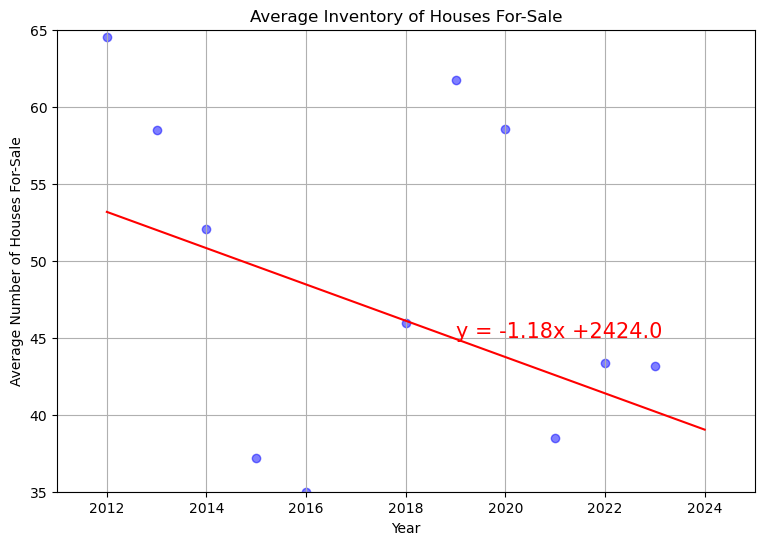

y = -1.18x +2424.0


In [24]:
x_values = average_inventory_by_yearALL.index
y_values = average_inventory_by_yearALL['inventory']


# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


# Build scatter plot for year vs inventory
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, c="blue", alpha = .5)


# Incorporate the other graph properties2
plt.title("Average Inventory of Houses For-Sale")
plt.xlabel('Year')
plt.ylabel('Average Number of Houses For-Sale')
plt.grid(True)
# plt.colorbar(label = "Inventory")
plt.annotate(line_eq, (2019,45),fontsize=15,color="red")
plt.xlim(2011, 2025)
plt.ylim(35, 65) 

plt.plot(x_values, regress_values, "r-", label=line_eq)
  
# Show plot
plt.show()




print(line_eq)

In [25]:
# Save the figure for ALLYEARS
plt.savefig("../figures/fig_ALLYEARSyear_by_inventory.png")

<Figure size 640x480 with 0 Axes>